In [54]:
import numpy as np
import os
import pickle
from scipy import stats

def load_data(file):
    print('loading file: ' + file)
    with open(file, 'rb') as f:
        data = pickle.load(f)

    return(data)

def upper(df):

    try:
        assert(type(df)==np.ndarray)
    except:
        if type(df)==pd.DataFrame:
            df = df.values
        else:
            raise TypeError('Must be np.ndarray or pd.DataFrame')
    mask = np.triu_indices(df.shape[0], k=1)
    return df[mask]

project_path = "/projects/crunchie/boyanova/EEG_Things/"

# Load CLIP rdms
clip_path = os.path.join(project_path, "eeg_prep", "scripts") 
vis = np.array(load_data(os.path.join(clip_path, "exp_stimuli_selection.pkl"))['image_embeddings'])
txt = np.array(load_data(os.path.join(clip_path, "exp_stimuli_selection.pkl"))['text_embeddings'])
vis_corr_mat = 1 - np.corrcoef(vis)
txt_corr_mat = 1 -  np.corrcoef(txt)

# create a subject matrix either svm or mahlanobis 
subject_path = os.path.join(project_path, "eeg_experiment", "eeg_decoding")
subjects = [2,3,4,5,7,8,9,10,11,12]


loading file: /projects/crunchie/boyanova/EEG_Things/eeg_prep/scripts/exp_stimuli_selection.pkl
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_prep/scripts/exp_stimuli_selection.pkl


In [62]:
txt.shape

(4, 768)

In [43]:
subject_data_svm = np.full((len(subjects), 4,4,4, 90), np.nan)

for sub_id, sub in enumerate(subjects):
    decoding_data = load_data(os.path.join(project_path, f"eeg_experiment/eeg_decoding/eeg_decoding_{sub:04d}.pickle"))
    for key_id, key in enumerate(decoding_data.keys()):
        vec = []
        for t in range(decoding_data[key].shape[-1]):
            subject_data_svm[sub_id, key_id,:,:, t] = (decoding_data[key][:, :, t] * 100) - 50

loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_decoding_0002.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_decoding_0003.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_decoding_0004.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_decoding_0005.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_decoding_0007.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_decoding_0008.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_decoding_0009.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_decoding_0010.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_decoding_0011.pickle
loading file: /projects/crunchie/boyanova/EEG_

In [44]:
n_subjects = len(subjects)
subject_data_edi = np.full((len(subjects), 4, 4, 4, 90), np.nan)

for sub_id, sub in enumerate(subjects):
    edi_data = load_data(os.path.join(project_path, f"eeg_experiment/eeg_decoding/eeg_mahlanobis_{sub:04d}.pickle"))
    for key_id, key in enumerate(edi_data.keys()):
        vec = []
        for t in range(edi_data[key].shape[-1]):
            subject_data_edi[sub_id, key_id, :, :, t] = edi_data[key][:, :, t]


loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_mahlanobis_0002.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_mahlanobis_0003.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_mahlanobis_0004.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_mahlanobis_0005.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_mahlanobis_0007.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_mahlanobis_0008.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_mahlanobis_0009.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_mahlanobis_0010.pickle
loading file: /projects/crunchie/boyanova/EEG_Things/eeg_experiment/eeg_decoding/eeg_mahlanobis_0011.pickle
loading file: /projects/crun

In [55]:
mean_sub_svm = np.nanmean(subject_data_svm, axis = 0)
mean_sub_edi = np.nanmean(subject_data_edi, axis = 0)
conds = mean_sub_svm.shape[0]
time = mean_sub_svm.shape[-1]

vis_corr = np.full((conds, time),np.nan)
txt_corr = np.full((conds, time),np.nan)
vis_data = upper(vis_corr_mat)
txt_data = upper(txt_corr_mat)

for cond in range(conds):
    for t in range(time):
        
        eeg_data = upper(mean_sub_edi[cond, :, :, t])
        vis_corr[cond, t] = stats.spearmanr(eeg_data, vis_data)[0]
        txt_corr[cond, t] = stats.spearmanr(eeg_data, txt_data)[0]


<ipython-input-55-7d3a83782d4d>:1: RuntimeWarning: Mean of empty slice
  mean_sub_svm = np.nanmean(subject_data_svm, axis = 0)
<ipython-input-55-7d3a83782d4d>:2: RuntimeWarning: Mean of empty slice
  mean_sub_edi = np.nanmean(subject_data_edi, axis = 0)


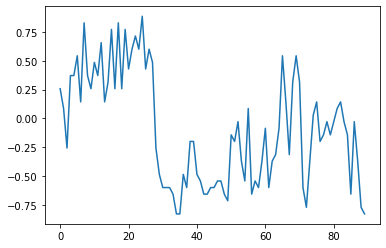

In [60]:
import matplotlib.pyplot as plt
plt.plot(vis_corr[])

In [61]:
eeg_data

array([11.2654035 , 11.26607396, 11.26688129, 11.26709523, 11.26666423,
       11.26625728])